# House Price Prediction Regression Model using Regularization

In [1]:
#Import all required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV,KFold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#Supress Warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import dataset
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA

In [3]:
house.shape

(1460, 81)

In [4]:
#Variables informations (Dtype,count)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Null value count of variables
house.isnull().sum()[house.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
#Replace nan value for the below columns with "Not Present"
cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish',
        'GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
for i in cols:
    house[i]=house[i].replace({np.nan: "Not Present"})

In [7]:
# Check for duplicate rows
house[house.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### Missing Value Imputation

In [8]:
#Count number of null values in a column.
col = house[house.columns[house.isnull().any()]]
col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrType   1452 non-null   object 
 2   MasVnrArea   1452 non-null   float64
 3   Electrical   1459 non-null   object 
 4   GarageYrBlt  1379 non-null   float64
dtypes: float64(3), object(2)
memory usage: 57.2+ KB


In [9]:
#Impute all the  null value of Numerical variables with median Categorical variable with mode value of the varialbles

for i in col.select_dtypes('float64'or'int64'):   #Numerical variables
    house[i] = house[i].fillna(house[i].median())
for i in col.select_dtypes('object'):             #Categorical Variables
    house[i] = house[i].fillna(house[i].mode()[0])

In [10]:
#Drop columns having more than 60% null values
house = house.loc[:,house.isnull().mean(axis=0)<0.60]


#Drop columns which contains more than 80% values associated to specific values
#Drop Id column
cols = house.columns
removecol =['Id']
for i in cols:
    if(house[i].value_counts().max() >= 1241):
        removecol.append(i)
house = house.drop(removecol,axis=1)
house.shape

(1460, 50)

### Sanity Checks

In [11]:
#Check if Year built is greater than Year sold of house.
house.loc[house['YearBuilt'] > house['YrSold']].shape

(0, 50)

In [12]:
#Check if Year Remodel is greater than Year sold of a house.
house.loc[house['YearRemodAdd'] > house['YrSold']].shape

(1, 50)

In [13]:
#Remove the row which have Remodel year greater the Year sold of house.
house = house[~(house['YearRemodAdd'] > house['YrSold'])]

### Derived Metrics

In [14]:
#Create new column to check whether the house was remodel or not
house['HouseRemodel']=np.where(house['YearBuilt'] == house['YearRemodAdd'],0,1).astype('object')

In [15]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   LotShape       1459 non-null   object 
 5   LotConfig      1459 non-null   object 
 6   Neighborhood   1459 non-null   object 
 7   BldgType       1459 non-null   object 
 8   HouseStyle     1459 non-null   object 
 9   OverallQual    1459 non-null   int64  
 10  OverallCond    1459 non-null   int64  
 11  YearBuilt      1459 non-null   int64  
 12  YearRemodAdd   1459 non-null   int64  
 13  RoofStyle      1459 non-null   object 
 14  Exterior1st    1459 non-null   object 
 15  Exterior2nd    1459 non-null   object 
 16  MasVnrType     1459 non-null   object 
 17  MasVnrArea     1459 non-null   float64
 18  ExterQua

In [16]:
#Create new column Effective age  that represent age of the house from the Remodel year
def checkForAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):         #No Remodel
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']    #House was Remodeled

house['EffectiveAge'] = house.apply(checkForAge,axis=1)

# Data Visualization

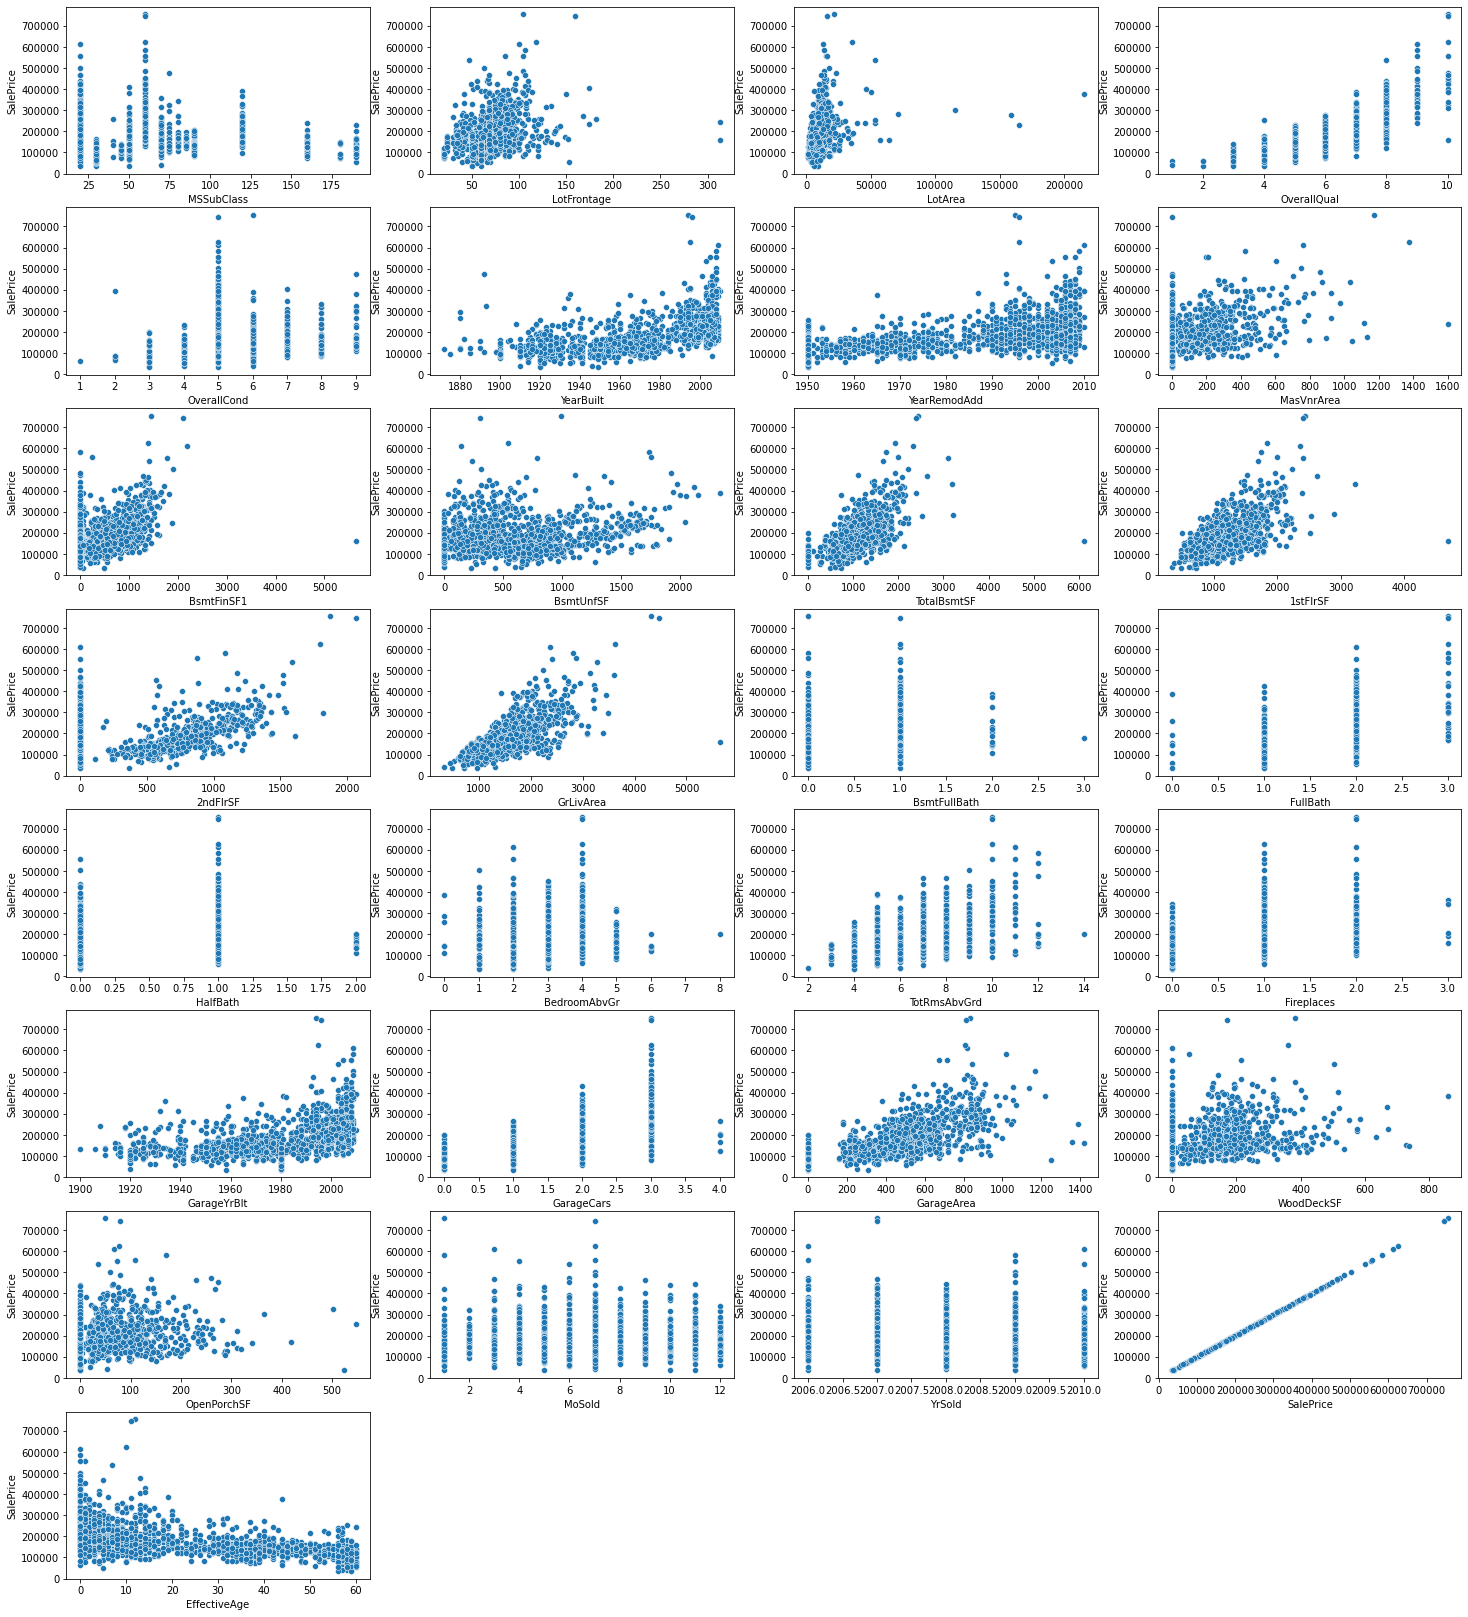

In [17]:
#visualizing the numerical variable.
#check relationship between target variable "Sale Price" and the predictor variables
col = (house.select_dtypes(include=['float64','int64']))
count=1
plt.subplots(figsize=(25, 40))
for i in col.columns:
    plt.subplot(11,4,count)
    sns.scatterplot(col[i],col['SalePrice'])
    
    count+=1
plt.show()

#### Observations:
- Increase in OverallQual (Rates the overall material and finish of the house) Price of house increase.
- 1stFlrSF(First Floor square feet) and GrLivArea(Above grade (ground) living area square feet) showing correlation towards right
- Price of the house increases with increase in GarageCars (Size of garage in car capacity)
- Other variables are too scattered and hence can be understood during further analysis

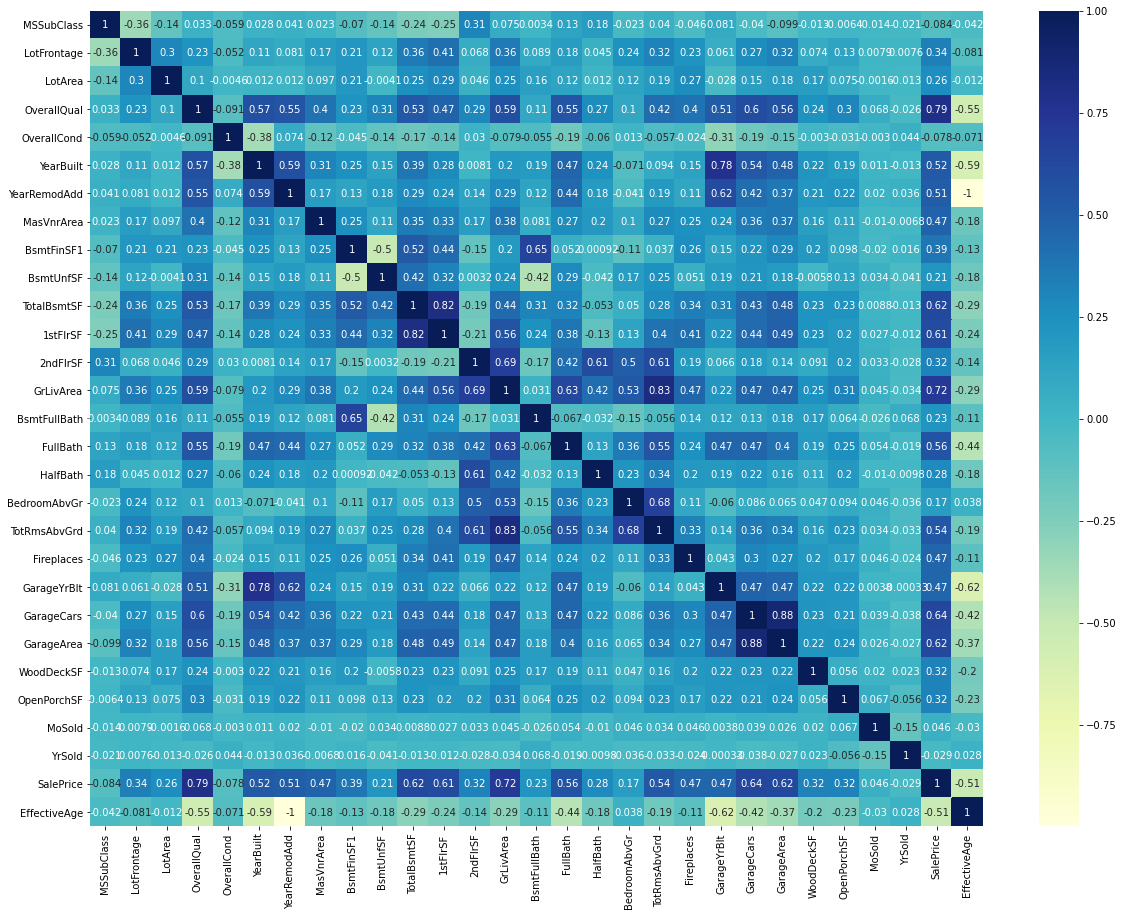

In [18]:
#Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(house.corr(),annot=True,cmap="YlGnBu")
plt.show()

#### Observation:
- GarageArea and GarageCars show 88% correlation.
- GarageYrBlt and YearBuilt show 78% correlation.
- SalePrice and OverallQual show 79% correlation.
- EffectiveAge and YearRemodAdd show negative 100% correlation
- GrLivArea and TotRmsAbvGrd show 83% correlation.
- 1stFlrSf and TotlaBsmtSF show 82% correlation.

In [19]:
#Dropping highly correlated variables.
house = house.drop(['GarageCars','YearBuilt','YearRemodAdd','TotRmsAbvGrd','TotalBsmtSF','OverallQual'],axis=1)
house.shape

(1459, 46)

# Preparing Data for Model Building

#### Mapping Variable

In [20]:
#Mapping variables
house['MSSubClass']= house['MSSubClass'].map({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',
                                              40:'1-STORY W/FINISHED ATTIC ALL AGES',45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                              50:'1-1/2 STORY FINISHED ALL AGES',60:'2-STORY 1946 & NEWER',
                                              70:'2-STORY 1945 & OLDER',75:'2-1/2 STORY ALL AGES',
                                              80:'SPLIT OR MULTI-LEVEL',85:'SPLIT FOYER',
                                              90:'DUPLEX - ALL STYLES AND AGES',120:'1-STORY PUD (Planned Unit Development)-1946&NEWER',
                                              150:'1-1/2 STORY PUD - ALL AGES',160:'2-STORY PUD - 1946 & NEWER',
                                              180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',190:'2 FAMILY CONVERSION-ALL STYLES AND AGES'})


In [21]:
#Mapping of categorical variable
#With increase in number quality increases.
# 0 means Not Present
house['LotShape'] = house['LotShape'].map({'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1})
house['ExterQual'] = house['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
house['BsmtQual']  = house['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Not Present':0})
house['BsmtExposure']=house['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'Not Present':0})
house['BsmtFinType1']=house['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'Not Present':0})
house['HeatingQC'] = house['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
house['KitchenQual'] = house['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
house['FireplaceQu'] = house['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Not Present':0})
house['GarageFinish']=house['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'Not Present':0})

#### Dummy Variable Creation

In [22]:
#Dummy Vaiable creation
col = house.select_dtypes('object')
print("Total categorical variables",len(col.columns))

dummyvar = pd.get_dummies(house[col.columns],drop_first=True)
print("Total dummies variable created",dummyvar.shape[1])

#concat the created dummy variables with the dataset.
house = pd.concat([dummyvar,house],axis=1)

#Drop the variables for which dummy variable is created.
house=house.drop(col.columns,axis=1)
house.head()

Total categorical variables 15
Total dummies variable created 115


,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development)-1946&NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION-ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,EffectiveAge
0,0,0,0,0,0,0,0,0,1,0,...,0,2003.0,2,548,0,61,2,2008,208500,5
1,0,0,1,0,0,0,0,0,0,0,...,3,1976.0,2,460,298,0,5,2007,181500,31
2,0,0,0,0,0,0,0,0,1,0,...,3,2001.0,2,608,0,42,9,2008,223500,6
3,0,0,0,0,0,0,0,1,0,0,...,4,1998.0,1,642,0,35,2,2006,140000,36
4,0,0,0,0,0,0,0,0,1,0,...,3,2000.0,2,836,192,84,12,2008,250000,8


#### Data Transformation

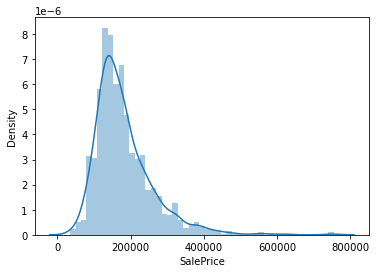

In [23]:
#SalePrice column
sns.distplot(house['SalePrice'])
plt.show()

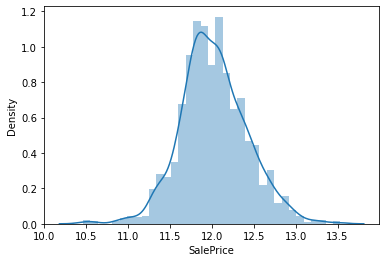

In [24]:
#Log transformation of SalePrice column to reduce skewness
house['SalePrice'] = np.log(house['SalePrice'])
sns.distplot(house['SalePrice'])
plt.show()

#### Test Train Split

In [25]:
# Putting response variable to y
y = house['SalePrice']

# Putting all feature variable to X
X = house.drop(['SalePrice'], axis=1)

In [26]:
#Split Train data in 70% and Test data in 30%
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)
print("Train dataset shape",X_train.shape)
print("Test  dataset shape",X_test.shape)

Train dataset shape (1021, 145)
Test  dataset shape (438, 145)


# Model Building

#### Scaling

In [27]:
#Use StandardScaler to fit the training set.
#StandardScaler removes the mean and scales each feature/variable to unit variance.
scaler = StandardScaler()
col = X_train.columns
X_train[col] = scaler.fit_transform(X_train[col])

#### Recursive Feature Elimination (RFE)

In [28]:
#There are total 145 variables, Select the top 50 variables using the RFE
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe = rfe.fit(X_train,y_train)

In [29]:
#Creating X_train dataframe with RFE selected variables
RFEcol = X_train.columns[rfe.support_]
X_train = X_train[RFEcol]
pd.set_option('display.max_columns', None)
X_train.head()

,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,RoofStyle_Gable,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_PConc,Foundation_Slab,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,OverallCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Fireplaces,GarageFinish,GarageArea
135,-0.224525,-0.196614,-0.209684,-0.099454,0.513433,-0.421455,-0.281569,-0.193911,-0.188406,-0.10436,-0.176955,-0.236311,-0.240896,-0.148398,-0.196614,-0.16165,-0.283590,0.989284,-1.833916,-0.044302,-0.191176,-0.031311,-0.733247,-0.411741,-0.031311,-0.031311,-0.201928,-0.719088,-0.403572,1.142252,-0.141351,0.810844,-0.252075,-0.586021,0.357459,-0.532012,-0.579556,-1.228745,-0.973208,-0.159394,1.346131,-0.785583,0.314867,-0.809513,0.777350,-0.764518,-0.757466,0.594593,-0.796486,0.267955
1452,-0.224525,-0.196614,-0.209684,-0.099454,-1.947672,2.372735,-0.281569,-0.193911,-0.188406,-0.10436,-0.176955,-0.236311,-0.240896,-0.148398,-0.196614,-0.16165,3.526218,-1.010832,0.545281,-0.044302,-0.191176,-0.031311,1.363798,-0.411741,-0.031311,-0.031311,-0.201928,1.390650,-0.403572,1.142252,-0.141351,-1.233283,-0.252075,-0.586021,-0.519862,0.583356,2.233723,1.139222,0.214016,-0.159394,-0.241591,-0.785583,-0.840866,1.094894,-1.018294,-0.764518,-0.757466,-0.934574,1.434549,0.244645
1047,-0.224525,-0.196614,-0.209684,-0.099454,0.513433,-0.421455,-0.281569,-0.193911,-0.188406,-0.10436,-0.176955,-0.236311,-0.240896,-0.148398,-0.196614,-0.16165,-0.283590,0.989284,0.545281,-0.044302,-0.191176,-0.031311,1.363798,-0.411741,-0.031311,-0.031311,-0.201928,1.390650,-0.403572,1.142252,-0.141351,-1.233283,-0.252075,1.706422,-0.519862,0.583356,-0.579556,1.139222,0.515705,0.883820,-0.455022,-0.785583,-0.996227,-0.809513,-1.018294,-0.764518,-0.757466,-0.934574,-0.796486,0.929964
692,-0.224525,-0.196614,-0.209684,-0.099454,0.513433,-0.421455,-0.281569,-0.193911,-0.188406,-0.10436,-0.176955,-0.236311,-0.240896,-0.148398,-0.196614,-0.16165,-0.283590,-1.010832,-1.833916,-0.044302,-0.191176,-0.031311,-0.733247,-0.411741,-0.031311,-0.031311,-0.201928,-0.719088,-0.403572,1.142252,-0.141351,0.810844,-0.252075,-0.586021,-0.519862,0.583356,2.233723,1.139222,1.121254,0.883820,0.190478,2.129145,1.900685,1.094894,0.777350,1.226739,0.750084,2.123759,0.319031,0.724835
435,-0.224525,-0.196614,-0.209684,-0.099454,0.513433,-0.421455,3.551525,-0.193911,-0.188406,-0.10436,-0.176955,-0.236311,-0.240896,-0.148398,-0.196614,-0.16165,-0.283590,-1.010832,0.545281,-0.044302,-0.191176,-0.031311,1.363798,-0.411741,-0.031311,-0.031311,-0.201928,1.390650,-0.403572,1.142252,-0.141351,0.810844,-0.252075,-0.586021,0.357459,0.583356,1.295963,1.139222,-0.137594,0.883820,-0.879282,1.112062,0.275080,1.094894,0.777350,1.226739,0.750084,0.594593,0.319031,0.361196


#### Ridge Regression

In [30]:
#List of alpha to tune.
#If alpha value is too high it will lead to underfitting,if it is too low it will not handle overfitting.
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

#Cross Validation
folds  = KFold(n_splits=10,shuffle=True,random_state=42)
model_ridge = GridSearchCV(estimator=ridge,param_grid=params,scoring="neg_mean_squared_error",cv=folds,return_train_score=True,
                        verbose = 1)
model_ridge.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [31]:
#Mean train and test score as per alpha values.

ridge_cv_results = pd.DataFrame(model_ridge.cv_results_)
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('float64')
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
24,100.0000,-0.017838,-0.022214,1
23,50.0000,-0.017438,-0.022279,2
22,20.0000,-0.017131,-0.022365,3
21,10.0000,-0.016978,-0.022396,4
20,9.0000,-0.016960,-0.022400,5
19,8.0000,-0.016940,-0.022404,6
18,7.0000,-0.016920,-0.022408,7
17,6.0000,-0.016899,-0.022413,8
16,5.0000,-0.016876,-0.022420,9
15,4.0000,-0.016852,-0.022428,10


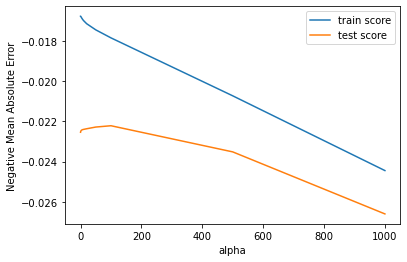

In [32]:
# plotting Negative absolute error for the train and test score

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [33]:
#Get the best optimal value of alpha for Ridge Model.
rigdeParameter = model_ridge.best_params_.get("alpha")
rigdeParameter

100

In [34]:
#Fitting Ridge Model for best hyperparameter alpha
model_ridge = Ridge(alpha=rigdeParameter)
model_ridge.fit(X_train,y_train)

#Print the coefficients of the values after fitting the model with optimal value.
pd.Series(model_ridge.coef_,X_train.columns).sort_values()

MSSubClass_1-STORY 1945 & OLDER           -0.034652
Neighborhood_MeadowV                      -0.022556
BldgType_TwnhsE                           -0.018456
BldgType_Twnhs                            -0.015145
RoofStyle_Gable                           -0.014781
Exterior1st_BrkComm                       -0.012933
BsmtFinSF1                                -0.012836
Exterior1st_Wd Sdng                       -0.010687
Exterior1st_VinylSd                       -0.004328
Exterior1st_CBlock                        -0.004081
Exterior2nd_CBlock                        -0.004081
BldgType_Duplex                           -0.003682
MSSubClass_DUPLEX - ALL STYLES AND AGES   -0.003682
Exterior2nd_AsphShn                        0.001342
MSZoning_RH                                0.004706
MSZoning_RM                                0.005088
Exterior2nd_Wd Sdng                        0.007453
Foundation_Slab                            0.008841
Exterior2nd_VinylSd                        0.009530
Neighborhood

In [35]:
#Print the Mean Squared error and the Train score for the Ridge Model for selected optimal value of alpha.
print("Mean squared error",mean_squared_error(y_train, model_ridge.predict(X_train)))
print("Train Score       ",model_ridge.score(X_train,y_train))

Mean squared error 0.017984708607274635
Train Score        0.8881958364193654


#### Lasso Regression

In [36]:
#List of alpha to tune.
#If alpha value is too high it will lead to underfitting,if it is too low it will not handle overfitting.
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}
lasso = Lasso()

#Cross Validation
folds = KFold(n_splits=10,shuffle=True,random_state=42)
model_lasso = GridSearchCV(estimator=lasso,param_grid=params,scoring="neg_mean_squared_error",cv=folds,
                           return_train_score=True,verbose=True)

model_lasso.fit(X_train, y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [37]:
#Mean train and test score as per alpha values.

lasso_cv_results = pd.DataFrame(model_lasso.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0003,-0.016863,-0.022487,1
1,0.0002,-0.016812,-0.022497,2
3,0.0004,-0.016897,-0.022511,3
0,0.0001,-0.016774,-0.022514,4
4,0.0005,-0.016932,-0.022550,5
5,0.001,-0.017176,-0.022701,6
6,0.002,-0.017712,-0.022791,7
7,0.003,-0.018056,-0.022947,8
8,0.004,-0.018459,-0.023138,9
9,0.005,-0.018855,-0.023331,10


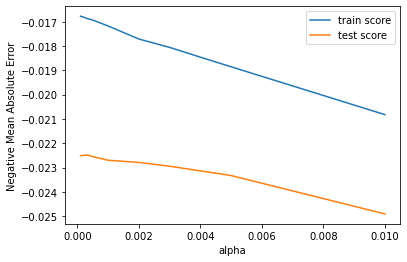

In [38]:
# plotting Negative absolute error for the train and test score

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [39]:
#Get the best optimal value of alpha for Ridge Model.
lassoParameter = model_lasso.best_params_.get("alpha")
lassoParameter

0.0003

In [40]:
#Fitting Lasso Model for best hyperparameter alpha
model_lasso = Lasso(alpha=lassoParameter)
model_lasso.fit(X_train,y_train)

#Print the coefficients of the values after fitting the model with optimal value.
pd.Series(model_lasso.coef_,X_train.columns).sort_values()

MSSubClass_1-STORY 1945 & OLDER           -0.037280
Exterior1st_VinylSd                       -0.026325
BsmtFinSF1                                -0.024192
Neighborhood_MeadowV                      -0.023936
BldgType_TwnhsE                           -0.022580
Exterior1st_Wd Sdng                       -0.016559
BldgType_Twnhs                            -0.016380
RoofStyle_Gable                           -0.015029
Exterior1st_BrkComm                       -0.014219
MSSubClass_DUPLEX - ALL STYLES AND AGES   -0.007322
Exterior1st_CBlock                        -0.006354
2ndFlrSF                                  -0.005894
Exterior2nd_CBlock                        -0.001611
BldgType_Duplex                           -0.000162
1stFlrSF                                  -0.000000
Exterior2nd_AsphShn                        0.002590
Neighborhood_BrkSide                       0.013076
Exterior2nd_Wd Sdng                        0.013165
GarageType_BuiltIn                         0.014170
Foundation_S

In [41]:
print("Mean squared error",mean_squared_error(y_train, model_lasso.predict(X_train)))
print("Train Score       ",model_lasso.score(X_train,y_train))

Mean squared error 0.017103099904098945
Train Score        0.8936764658705479


# Model Evaluation

In [42]:
#Scaling on test data
#Use transform on test data set to scale the variables
col = X_test.columns
X_test[col] = scaler.transform(X_test[col])

In [43]:
#RFE
#Variable that are selected by RFE.
X_test = X_test[RFEcol]
pd.set_option('display.max_columns', None)
X_test.head()

,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,RoofStyle_Gable,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_PConc,Foundation_Slab,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,OverallCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Fireplaces,GarageFinish,GarageArea
1322,-0.224525,-0.196614,-0.209684,-0.099454,0.513433,-0.421455,-0.281569,-0.193911,-0.188406,-0.10436,5.651149,-0.236311,-0.240896,-0.148398,-0.196614,-0.161650,-0.28359,-1.010832,0.545281,-0.044302,-0.191176,-0.031311,-0.733247,-0.411741,-0.031311,-0.031311,-0.201928,-0.719088,-0.403572,1.142252,-0.141351,0.810844,-0.252075,-0.586021,-0.519862,0.583356,-0.579556,1.139222,0.489660,0.883820,-0.270222,1.175772,0.771477,1.094894,0.777350,1.226739,0.750084,0.594593,0.319031,0.426465
837,-0.224525,-0.196614,-0.209684,-0.099454,-1.947672,2.372735,-0.281569,-0.193911,-0.188406,-0.10436,-0.176955,-0.236311,-0.240896,-0.148398,-0.196614,6.186213,-0.28359,-1.010832,0.545281,-0.044302,-0.191176,-0.031311,-0.733247,-0.411741,-0.031311,-0.031311,-0.201928,-0.719088,-0.403572,-0.875463,-0.141351,-1.233283,-0.252075,1.706422,-0.519862,-0.532012,-0.579556,0.192035,-0.256967,-1.202608,-1.774654,0.361195,-1.001911,1.094894,-1.018294,1.226739,-0.757466,-0.934574,-0.796486,-0.972147
413,4.453845,-0.196614,-0.209684,-0.099454,-1.947672,2.372735,-0.281569,-0.193911,-0.188406,-0.10436,-0.176955,-0.236311,-0.240896,-0.148398,-0.196614,-0.161650,-0.28359,0.989284,0.545281,-0.044302,-0.191176,-0.031311,-0.733247,-0.411741,-0.031311,-0.031311,-0.201928,-0.719088,-0.403572,-0.875463,-0.141351,-1.233283,-0.252075,1.706422,0.357459,-0.532012,-0.579556,-1.228745,-0.973208,-0.159394,-0.356115,-0.785583,-0.924231,-0.809513,-1.018294,-0.764518,-0.757466,0.594593,-0.796486,-0.524591
522,-0.224525,-0.196614,-0.209684,-0.099454,-1.947672,2.372735,-0.281569,5.156995,-0.188406,-0.10436,-0.176955,-0.236311,-0.240896,-0.148398,-0.196614,-0.161650,-0.28359,-1.010832,0.545281,-0.044302,-0.191176,-0.031311,-0.733247,-0.411741,-0.031311,-0.031311,4.952272,-0.719088,-0.403572,-0.875463,-0.141351,-1.233283,-0.252075,1.706422,1.234780,-0.532012,-0.579556,0.665628,-0.107208,0.883820,-0.418583,0.716150,0.280764,-0.809513,0.777350,-0.764518,-0.757466,2.123759,-0.796486,-0.244869
1036,-0.224525,-0.196614,-0.209684,-0.099454,0.513433,-0.421455,-0.281569,-0.193911,-0.188406,-0.10436,-0.176955,-0.236311,-0.240896,-0.148398,-0.196614,-0.161650,-0.28359,0.989284,-1.833916,-0.044302,-0.191176,-0.031311,1.363798,-0.411741,-0.031311,-0.031311,-0.201928,1.390650,-0.403572,1.142252,-0.141351,0.810844,-0.252075,-0.586021,-0.519862,1.698724,2.233723,1.139222,1.244968,0.883820,1.184756,-0.785583,0.197399,1.094894,0.777350,-0.764518,2.257634,0.594593,1.434549,2.048853


#### Ridge Model Evaluation

In [44]:

metric_ridge = []

#R2Score 
metric_ridge.append(r2_score(y_train,model_ridge.predict(X_train)))
metric_ridge.append(r2_score(y_test,model_ridge.predict(X_test)))

#RSS
metric_ridge.append(np.sum(np.square(y_train,model_ridge.predict(X_train))))
metric_ridge.append(np.sum(np.square(y_test,model_ridge.predict(X_test))))

#MSE
metric_ridge.append(mean_squared_error(y_train,model_ridge.predict(X_train)))
metric_ridge.append(mean_squared_error(y_test,model_ridge.predict(X_test)))

#### Lasso Model Evaluation

In [45]:

metric_lasso = []
#R2Score
metric_lasso.append(r2_score(y_train,model_lasso.predict(X_train)))
metric_lasso.append(r2_score(y_test,model_lasso.predict(X_test)))

#RSS
metric_lasso.append(np.sum(np.square(y_train,model_lasso.predict(X_train))))
metric_lasso.append(np.sum(np.square(y_test,model_lasso.predict(X_test))))

#MSE
metric_lasso.append(mean_squared_error(y_train,model_lasso.predict(X_train)))
metric_lasso.append(mean_squared_error(y_test,model_lasso.predict(X_test)))

In [46]:
#Creating a table which contains all the matrics

lr_table = {'Metrics' : ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)']}
lr_metrics = pd.DataFrame(lr_table,columns=['Metrics'])

rg_metrics = pd.Series(metric_ridge,name="Ridge Regression")
ls_metrics = pd.Series(metric_lasso,name="Lasso Regression")

final_metrics = pd.concat([lr_metrics,rg_metrics,ls_metrics],axis=1)
final_metrics

,Metrics,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.888196,0.893676
1,R2 Score (Test),0.875241,0.883841
2,RSS (Train),147831.852712,147831.852712
3,RSS (Test),63337.477773,63337.477773
4,MSE (Train),0.017985,0.017103
5,MSE (Test),0.019522,0.018176


In [47]:
#Function to return the top 10 features with repect to its coefficients for the provided model.

def topFeatures(model):
    def find(x):
        return coeff_dict[x]

    #Coefficient of the predictor variables
    coeff_dict = dict(pd.Series(model.coef_, index = X_train.columns))

    dataframe =  pd.DataFrame(X_train.columns,columns=['Features'])
    dataframe['Coefficient'] = dataframe['Features'].apply(find)
    dataframe = dataframe.sort_values(by=['Coefficient'], ascending=False)
    dataframe = dataframe.head(10)
    return dataframe 

In [48]:
#Top 10 features of lasso model
topFeatures(model_lasso)

,Features,Coefficient
42,GrLivArea,0.128374
4,MSZoning_RL,0.117045
5,MSZoning_RM,0.085226
35,BsmtQual,0.058284
2,MSZoning_FV,0.055884
49,GarageArea,0.042955
11,Neighborhood_NridgHt,0.041484
44,FullBath,0.041111
34,OverallCond,0.040526
31,GarageType_Attchd,0.040379


In [49]:
#Top 10 features of ridge model.
topFeatures(model_ridge)

,Features,Coefficient
42,GrLivArea,0.065742
35,BsmtQual,0.049674
49,GarageArea,0.043933
40,1stFlrSF,0.043271
44,FullBath,0.041738
46,KitchenQual,0.040584
34,OverallCond,0.037861
11,Neighborhood_NridgHt,0.037014
47,Fireplaces,0.033845
31,GarageType_Attchd,0.031433


## Final Model

#### Best alpha value for Lasso Model is 0.0003

#### Best alpha value for Ridge Model is 100

#### The Mean Squared error in case of Lasso and Ridge are:
-   Lasso : 0.018176
-   Ridge : 0.019522

####  The Mean Squared Error of Lasso is slightly lower than that of Ridge
####  Lasso has a better edge over Ridge, Lasso penalize more on dataset and helps in feature elimination.


#### Based on Lasso the feature that are significant in predicting the price of a house are :
Living area square feet, Zoning classification, Height of the basement, Size of garage in square feet, Overall condition, Northridge Heights Neighborhood,Number of Full bathrooms,and attach Garage type